# 670240 Ruben Stoop
## * Install packages

In [1]:
#enter here all those 'from .... import ....'
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')    

# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
    
    
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

try:
    import statsmodels.api as sm
    print('statsmodels already installed, only imported')
except:
    !pip install statsmodels
    import statsmodels.api as sm
    print('statsmodels was not installed, installed and imported')    
    
# sklearn
try:
    from sklearn.linear_model import LinearRegression
    print('sklearn already installed, only imported')
except:
    !pip install sklearn
    from sklearn.linear_model import LinearRegression
    print('sklearn was not installed, installed and imported')

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import combinations
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
from matplotlib.pyplot import figure

try:
    import seaborn as sns
    print('statsmodels already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sns
    print('statsmodels was not installed, installed and imported')
    
from datetime import datetime, timedelta


pandas already installed, only imported
NumPy already installed, only imported
PyPlot already installed, only imported
statsmodels already installed, only imported
sklearn already installed, only imported
statsmodels already installed, only imported


## Read in data

In [2]:
covid_cases=pd.read_csv('WHO-COVID-19-global-data.csv')

#remove country code as it is a duplicate of country
covid_cases = covid_cases.drop("Country_code", axis=1)
covid_cases.head()


,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,Afghanistan,EMRO,0,0,0,0


### Function to normalize dataset

In [3]:
def convert_dataset_to_numbers(covid_cases=pd.read_csv('WHO-COVID-19-global-data.csv')):
    covid_cases = covid_cases.drop("Country_code", axis=1)
    #convert class columns to numbers
    le = preprocessing.LabelEncoder()
    le.fit(covid_cases['Date_reported'])
    covid_cases['Date_reported']=le.transform(covid_cases['Date_reported'])


    le = preprocessing.LabelEncoder()
    le.fit(covid_cases['Country'])
    covid_cases['Country']=le.transform(covid_cases['Country'])

    le = preprocessing.LabelEncoder()
    le.fit(covid_cases['WHO_region'])
    covid_cases['WHO_region']=le.transform(covid_cases['WHO_region'])
    
    return covid_cases


### Feature extraction method 1

<AxesSubplot:>

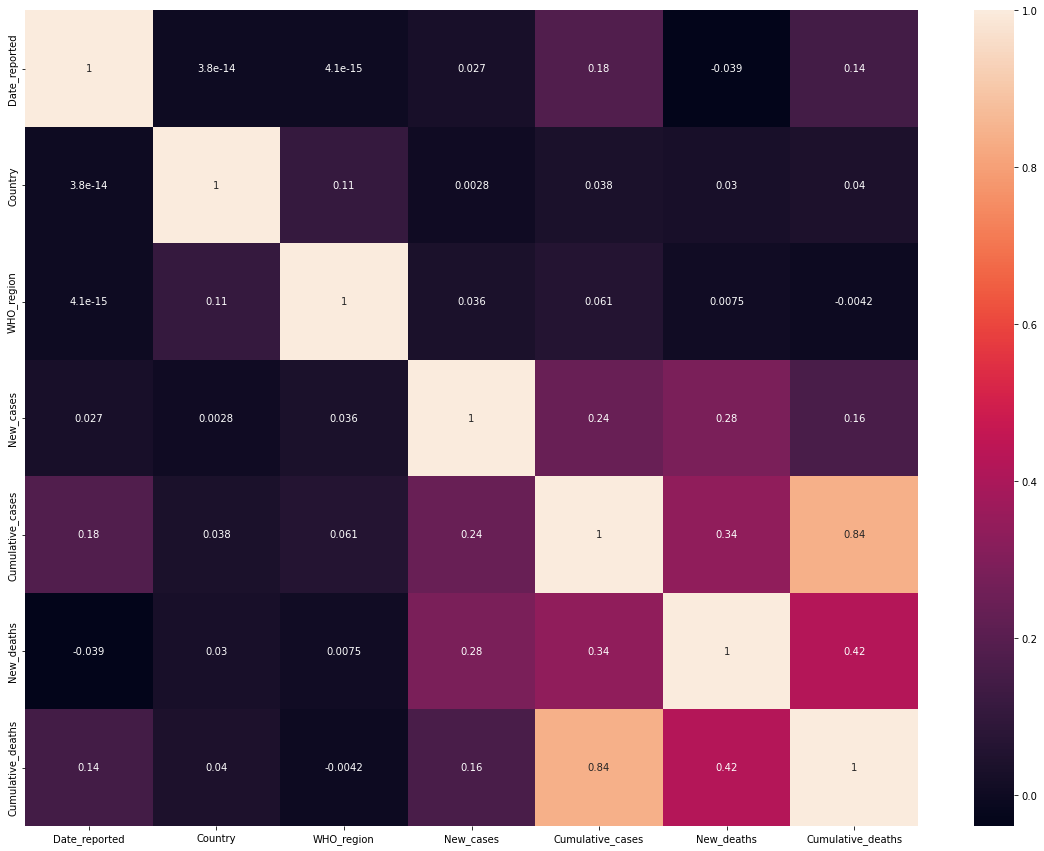

In [4]:
features = convert_dataset_to_numbers()
plt.subplots(figsize=(20,15))
sns.heatmap(features.corr(), annot=True)

### Feature extraction method 2

In [5]:
features = convert_dataset_to_numbers()

y = features['New_deaths']

X = features[['Date_reported',
                                   'Country',
                                   'New_cases',
                                   'Cumulative_cases', 
                                   'WHO_region', 
                                   'Cumulative_deaths'
                                  ]]
X=sm.add_constant(X)
X=X.to_numpy()

#splits the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


#add code here to model and fit the new X with the y, and show the model summary and how well the model performmed:
#code to split the data, and create & fit the model:

#adds the constant to the vif comparison at the end

y = covid_cases["New_deaths"].to_numpy().reshape((-1,1))

#creates the model with training data
allModel=sm.OLS(y_train,x_train).fit()

#code to show model summary and how well the model performmed
allModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             New_deaths   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     8688.
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        17:51:23   Log-Likelihood:            -1.0742e+06
No. Observations:              171066   AIC:                         2.148e+06
Df Residuals:                  171059   BIC:                         2.149e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.4821      0.886     32.163      0.000      26.746      30.218
x1            -0.0402      0.001    -43.920      0.000      -0.042      -0.038
x2             0.0260      0.005      5.661      0.000       0.017       0.035
x3             0.0009   8.27e-06    104.908      0.000       0.001       0.001
x4         -2.647e-06   1.02e-07    -25.934      0.000   -2.85e-06   -2.45e-06
x5             0.5526      0.158      3.504      0.000       0.243       0.862
x6             0.0010   8.19e-06    122.751      0.000       0.001       0.001
==============================================================================
Omnibus:                   327945.786   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3105734738.936
Skew:                          14.336   Prob(JB):                         0.00
Kurtosis:                     662.471   Cond. No.                     1.68e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Feature extraction method 3

In [6]:
# features = convert_dataset_to_numbers()
features = convert_dataset_to_numbers()
features = sm.add_constant(features)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                          for i in range(features.shape[1])]
  
print(vif_data)


             feature       VIF
0              const  8.094438
1      Date_reported  1.047727
2            Country  1.013868
3         WHO_region  1.027013
4          New_cases  1.138427
5   Cumulative_cases  3.655421
6         New_deaths  1.316235
7  Cumulative_deaths  3.798505


### Feature extraction method 4

In [7]:
# all possible columns for X
# define Y as same accross the loops

covid_cases = convert_dataset_to_numbers()

cols = [x for x in covid_cases.columns if x != 'New_deaths']

# define result dictionary
fit_d = {}

# loop for any length of combinations
for i in range(1, len(cols)+1):
    # loop for any combinations with length i
    for comb in combinations(cols, i):        

        
        # Define X from the combination
        X = covid_cases[list(comb)]
        X = sm.add_constant(X)

        # perform the OLS opertion
        model = sm.OLS(y,X, missing = 'drop').fit()
        # save the rsquared in a dictionnary
        fit_d[comb] = model.rsquared

# extract the key for the max R value
key_max = max(fit_d, key=fit_d.get)

print(f'Best variables {key_max} for a R-value of {round(fit_d[key_max], 5)}')

Best variables ('Date_reported', 'Country', 'WHO_region', 'New_cases', 'Cumulative_cases', 'Cumulative_deaths') for a R-value of 0.24026


Based on the feature selection I have decided to use all of the variables

## An example without a pipeline

In [8]:
train_set = convert_dataset_to_numbers()
test_set = convert_dataset_to_numbers()

train_set_x = train_set[[*key_max]]
train_set_y = train_set[['New_deaths']]

test_set_x = test_set[[*key_max]]
test_set_y = test_set[['New_deaths']]

standard_scaler = StandardScaler()
train_set_x = standard_scaler.fit_transform(train_set_x)
test_set_x = standard_scaler.transform(test_set_x)

hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 156

model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')])

msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer='adam', 
    metrics=[msle])


# train the model
history = model.fit(
    train_set_x, 
    train_set_y, 
    epochs=40, 
    batch_size=64,
    validation_split=0.2
)
model.summary()


Epoch 1/40
3564/3564 [==============================] - 7s 2ms/step - loss: 0.5161 - mean_squared_logarithmic_error: 0.5161 - val_loss: 0.5289 - val_mean_squared_logarithmic_error: 0.5289
Epoch 2/40
3564/3564 [==============================] - 7s 2ms/step - loss: 0.3808 - mean_squared_logarithmic_error: 0.3808 - val_loss: 0.5346 - val_mean_squared_logarithmic_error: 0.5346
Epoch 3/40
3564/3564 [==============================] - 7s 2ms/step - loss: 0.3455 - mean_squared_logarithmic_error: 0.3455 - val_loss: 0.6039 - val_mean_squared_logarithmic_error: 0.6039
Epoch 4/40
3564/3564 [==============================] - 7s 2ms/step - loss: 0.3223 - mean_squared_logarithmic_error: 0.3223 - val_loss: 0.6221 - val_mean_squared_logarithmic_error: 0.6221
Epoch 5/40
3564/3564 [==============================] - 7s 2ms/step - loss: 0.3008 - mean_squared_logarithmic_error: 0.3008 - val_loss: 0.5957 - val_mean_squared_logarithmic_error: 0.5957
Epoch 6/40
3564/3564 [==============================] - 7s 2

### Showing the result of the first 1000 predictions

8910/8910 [==============================] - 8s 943us/step


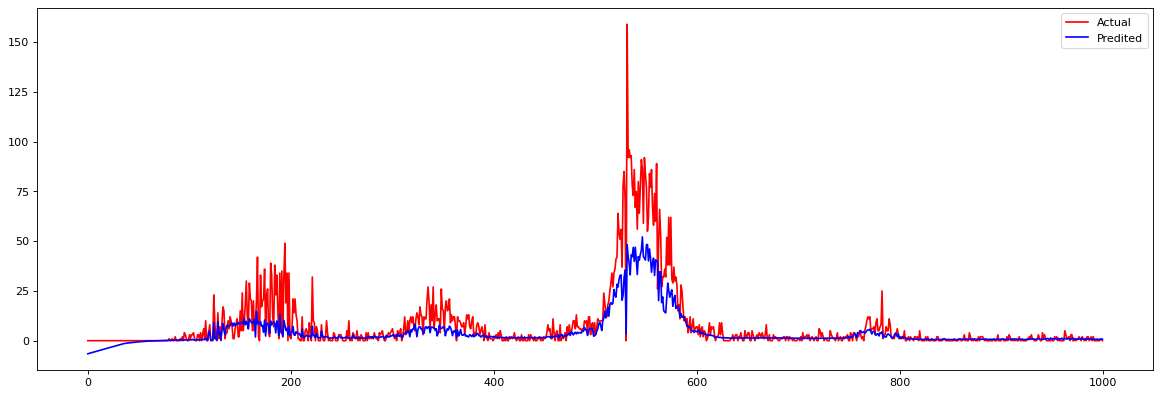

In [9]:
Pred_target = model.predict(test_set_x)

import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(18, 6), dpi=80)

plt.plot(np.array(test_set_y)[0:1000,],  color='r', label='Actual')
plt.plot(Pred_target[0:1000,], color='b', label='Predited')
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

### First example of a pipeline with a LinearRegression model

Model score: 0.398


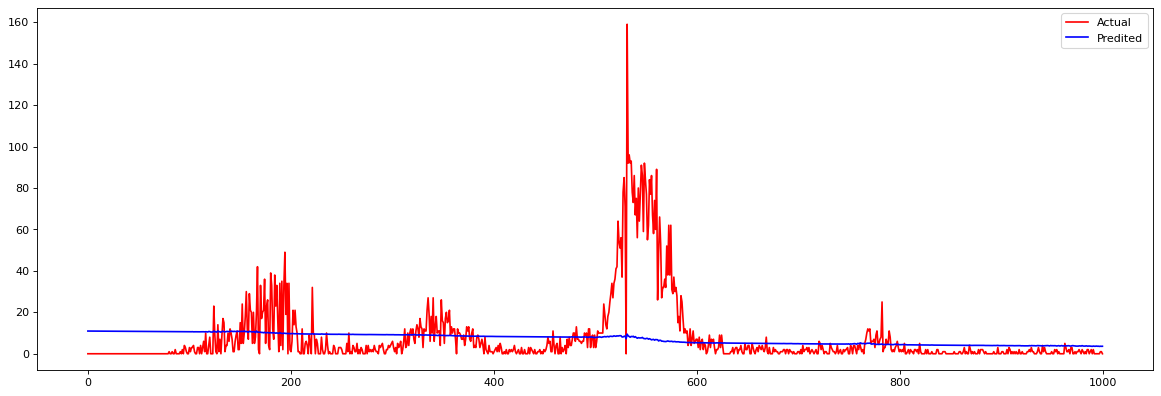

In [10]:

# Define the features and target columns
features = [*key_max]
target = 'New_deaths'
class_columns = ['Country', 'WHO_region']

data = pd.read_csv('WHO-COVID-19-global-data.csv')


# Split the dataframe into features and target
X = data[features]
y = data[target]

# Create a ColumnTransformer to handle data preprocessing for different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['New_cases', 'Cumulative_cases', 'Cumulative_deaths']),  # Numerical features: normalize using StandardScaler
        ('date', OrdinalEncoder(dtype=int, handle_unknown='use_encoded_value', unknown_value=-1), ['Date_reported']),  # Date column: convert to numerical representation, handle unknown categories
        ('cat', OneHotEncoder(), class_columns)  # Class column: one-hot encode
    ])

# Define the regression model
model = LinearRegression()

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])


# Fit the pipeline to the data
pipeline.fit(X, y)


# Use the pipeline to make predictions
predictions = pipeline.predict(X)

# Evaluate the pipeline on the test data
score = pipeline.score(X, y)

print("Model score: %.3f" % score)


figure(figsize=(18, 6), dpi=80)

plt.plot(np.array(y)[0:1000,],  color='r', label='Actual')
plt.plot(predictions[0:1000,], color='b', label='Predited')
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()


As you can see this is not exactly accurate with the standard linearregression

### Pipeline with custom model

Epoch 1/40


C:\Users\nebur\AppData\Local\Temp\ipykernel_2316\1797352139.py:63: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=create_model, epochs=40, batch_size=32)


7128/7128 [==============================] - 14s 2ms/step - loss: 0.5030 - mean_squared_logarithmic_error: 0.5030
Epoch 2/40
7128/7128 [==============================] - 13s 2ms/step - loss: 0.3805 - mean_squared_logarithmic_error: 0.3805
Epoch 3/40
7128/7128 [==============================] - 13s 2ms/step - loss: 0.3380 - mean_squared_logarithmic_error: 0.3380
Epoch 4/40
7128/7128 [==============================] - 13s 2ms/step - loss: 0.3106 - mean_squared_logarithmic_error: 0.3106
Epoch 5/40
7128/7128 [==============================] - 13s 2ms/step - loss: 0.2913 - mean_squared_logarithmic_error: 0.2913
Epoch 6/40
7128/7128 [==============================] - 13s 2ms/step - loss: 0.2759 - mean_squared_logarithmic_error: 0.2759
Epoch 7/40
7128/7128 [==============================] - 13s 2ms/step - loss: 0.2638 - mean_squared_logarithmic_error: 0.2638
Epoch 8/40
7128/7128 [==============================] - 13s 2ms/step - loss: 0.2541 - mean_squared_logarithmic_error: 0.2541
Epoch 9/40


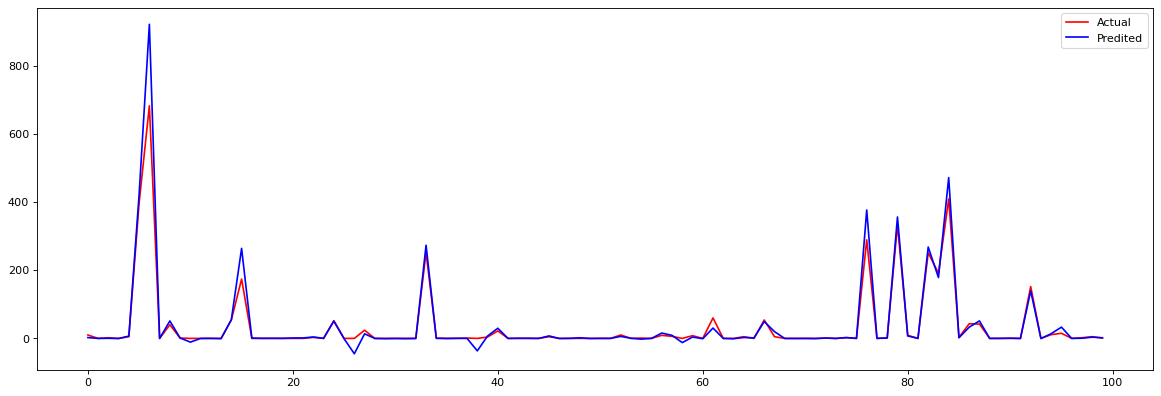

In [17]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 156

import time 
#importing the time library 

start = time.time()

# Load the dataset
data=convert_dataset_to_numbers()

# Define the features and target column
features = data.drop('New_deaths', axis=1)

target = data['New_deaths']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the preprocessor for numerical features
numeric_features = ['Cumulative_cases', 'New_cases', 'Cumulative_deaths', 'Date_reported', 'Country', 'WHO_region']
numeric_transformer = StandardScaler()

# Create the preprocessor for categorical features
categorical_features = []
categorical_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
    ], remainder='passthrough')

# Custom transformer to convert DataFrame to numpy array
class DataFrameToArrayTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X)
    
# Define the model architecture
def create_model():
    model = Sequential([
                Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
                Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
                Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
                Dense(1, kernel_initializer='normal', activation='linear')])

    msle = MeanSquaredLogarithmicError()
    model.compile(loss=msle, 
                optimizer='adam', 
                metrics=[msle])
    return model

# Create the KerasRegressor with the custom model
regressor = KerasRegressor(build_fn=create_model, epochs=40, batch_size=32)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dataframe_to_array', DataFrameToArrayTransformer()),  # Convert DataFrame to numpy array
    ('regressor', regressor)
])
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
score = pipeline.score(X_test, y_test)



end = time.time()
print("THE PROCESS TOOK :",end - start)

# Use the pipeline to make predictions
predictions = pipeline.predict(X_test)


mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


print('Mean Squared Error:', mse)
print('R-squared:', r2)
print("Model score: %.3f" % score)



figure(figsize=(18, 6), dpi=80)

plt.plot(np.array(y_test)[0:100,],  color='r', label='Actual')
plt.plot(predictions[0:100,], color='b', label='Predited')
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()
